# Support Vector Machines - Classification

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [75]:
df=pd.read_csv("diabetes.csv")

In [76]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0            6      148             72             35        0 33.600   
1            1       85             66             29        0 26.600   
2            8      183             64              0        0 23.300   
3            1       89             66             23       94 28.100   
4            0      137             40             35      168 43.100   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [77]:
df.shape

(768, 9)

## Exploratory Data Analysis and Visualization

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [79]:
df.describe().T

count    mean     std    min    25%     50%  \
Pregnancies              768.000   3.845   3.370  0.000  1.000   3.000   
Glucose                  768.000 120.895  31.973  0.000 99.000 117.000   
BloodPressure            768.000  69.105  19.356  0.000 62.000  72.000   
SkinThickness            768.000  20.536  15.952  0.000  0.000  23.000   
Insulin                  768.000  79.799 115.244  0.000  0.000  30.500   
BMI                      768.000  31.993   7.884  0.000 27.300  32.000   
DiabetesPedigreeFunction 768.000   0.472   0.331  0.078  0.244   0.372   
Age                      768.000  33.241  11.760 21.000 24.000  29.000   
Outcome                  768.000   0.349   0.477  0.000  0.000   0.000   

                             75%     max  
Pregnancies                6.000  17.000  
Glucose                  140.250 199.000  
BloodPressure             80.000 122.000  
SkinThickness             32.000  99.000  
Insulin                  127.250 846.000  
BMI                       36.600  67.100  
DiabetesPedigreeFunction   0.626   2.420  
Age                       41.000  81.000  
Outcome                    1.000   1.000

In [80]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

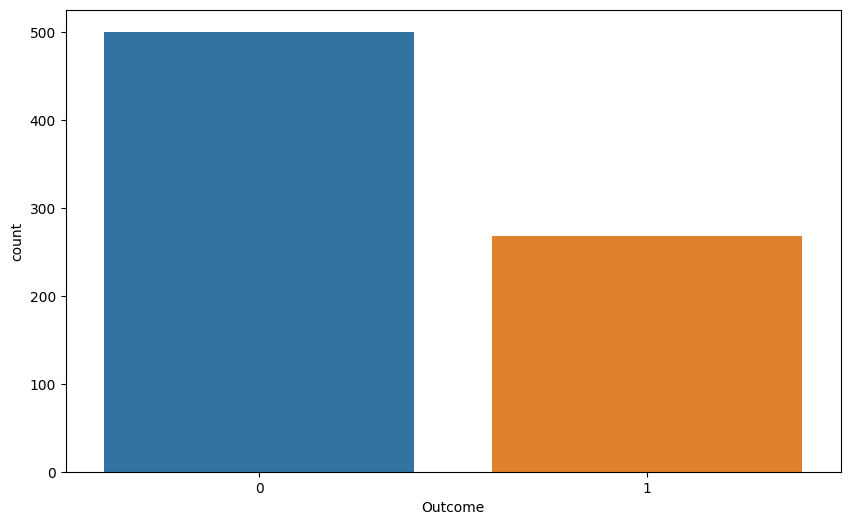

In [81]:
sns.countplot(df.Outcome);

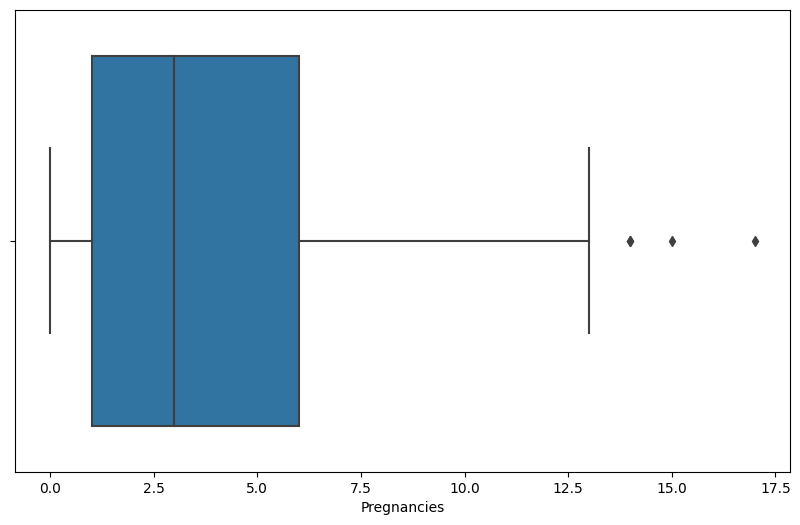

In [82]:
sns.boxplot(df.Pregnancies);

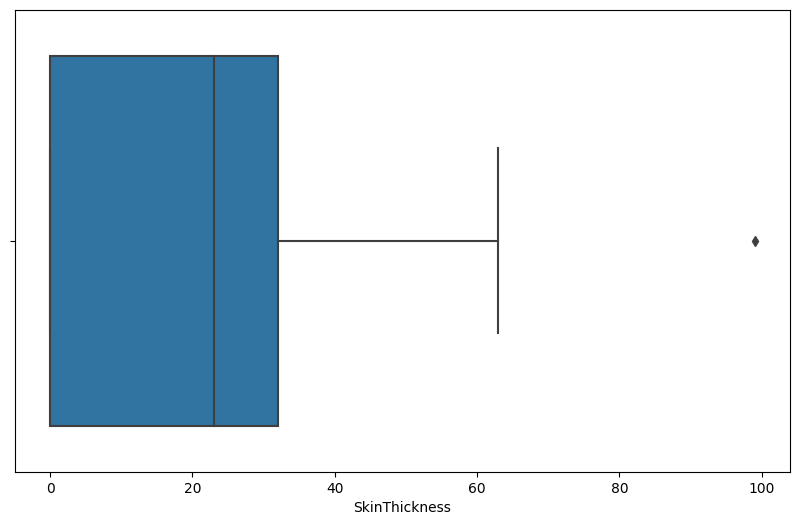

In [83]:
sns.boxplot(df.SkinThickness);

In [84]:
df=df[df.SkinThickness<70]

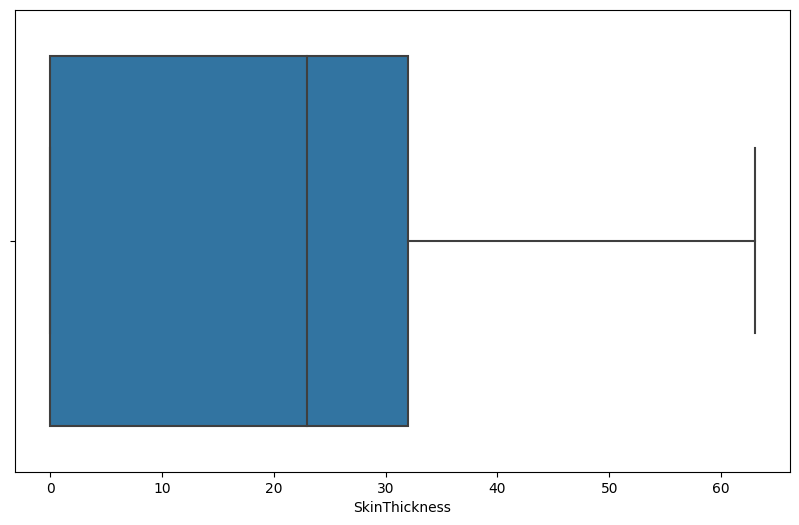

In [85]:
sns.boxplot(df.SkinThickness);

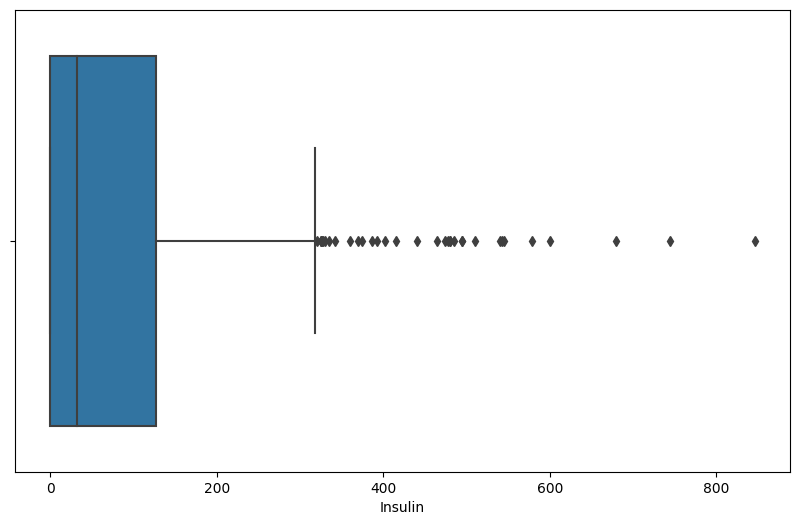

In [86]:
sns.boxplot(df.Insulin);

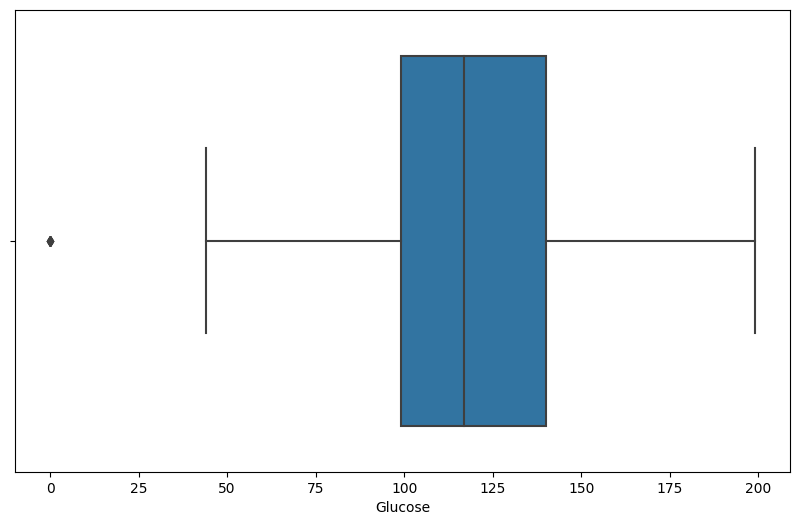

In [87]:
sns.boxplot(df.Glucose);

In [88]:
df=df[df.Glucose>0]

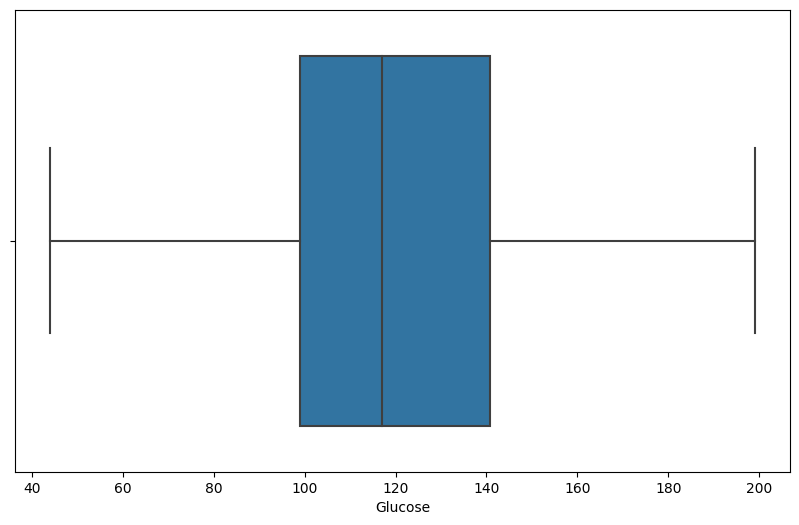

In [89]:
sns.boxplot(df.Glucose);

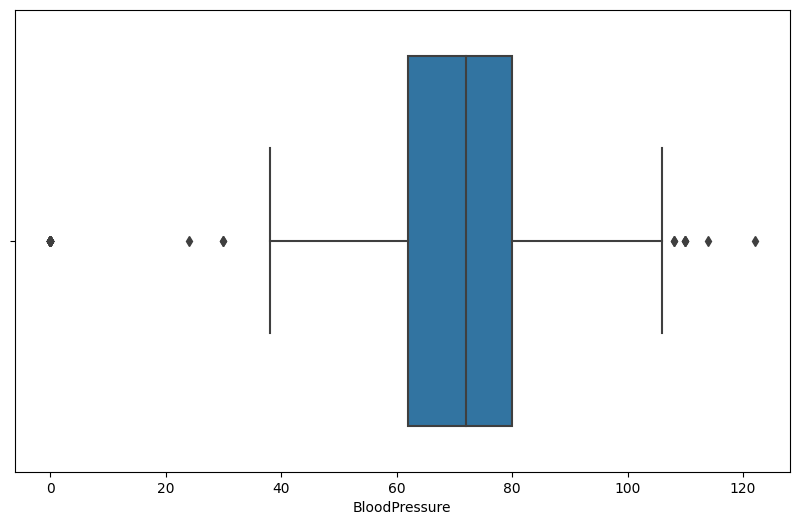

In [90]:
sns.boxplot(df.BloodPressure);

In [91]:
df=df[df.BloodPressure>35]

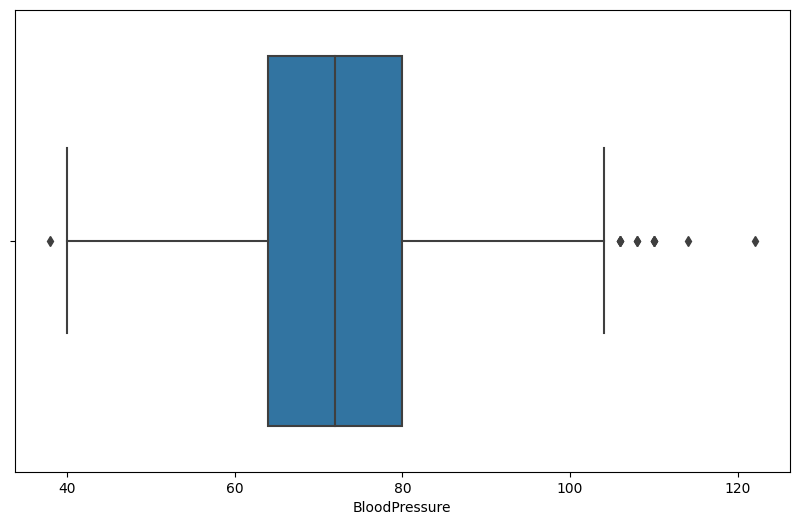

In [92]:
sns.boxplot(df.BloodPressure);

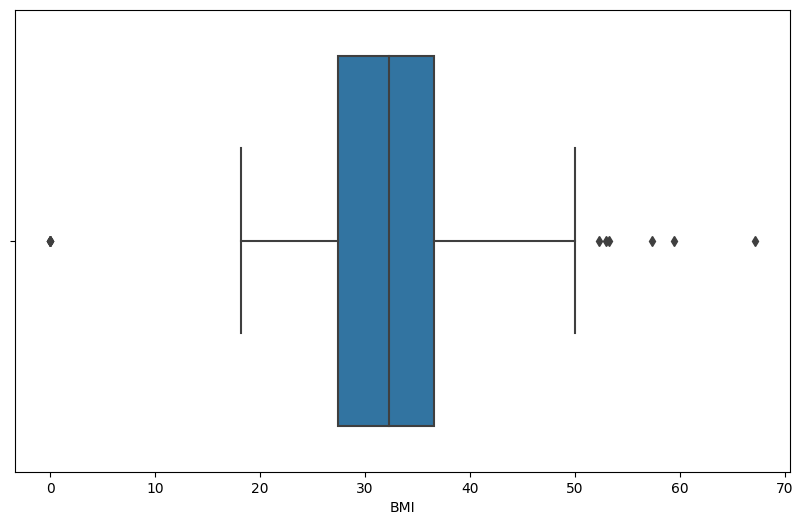

In [93]:
sns.boxplot(df.BMI);

In [94]:
df=df[df.BMI>0]

<AxesSubplot:xlabel='BMI'>

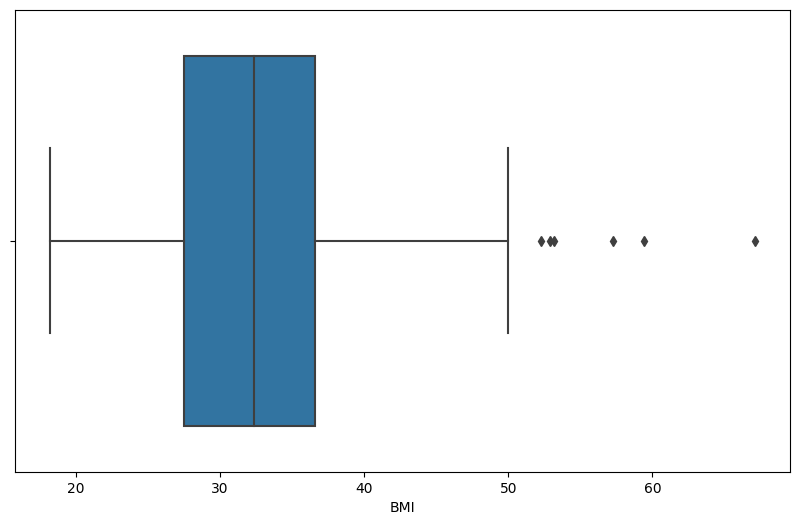

In [95]:
sns.boxplot(df.BMI)

In [96]:
df.shape

(720, 9)

In [97]:
df.Outcome.value_counts()

0    473
1    247
Name: Outcome, dtype: int64

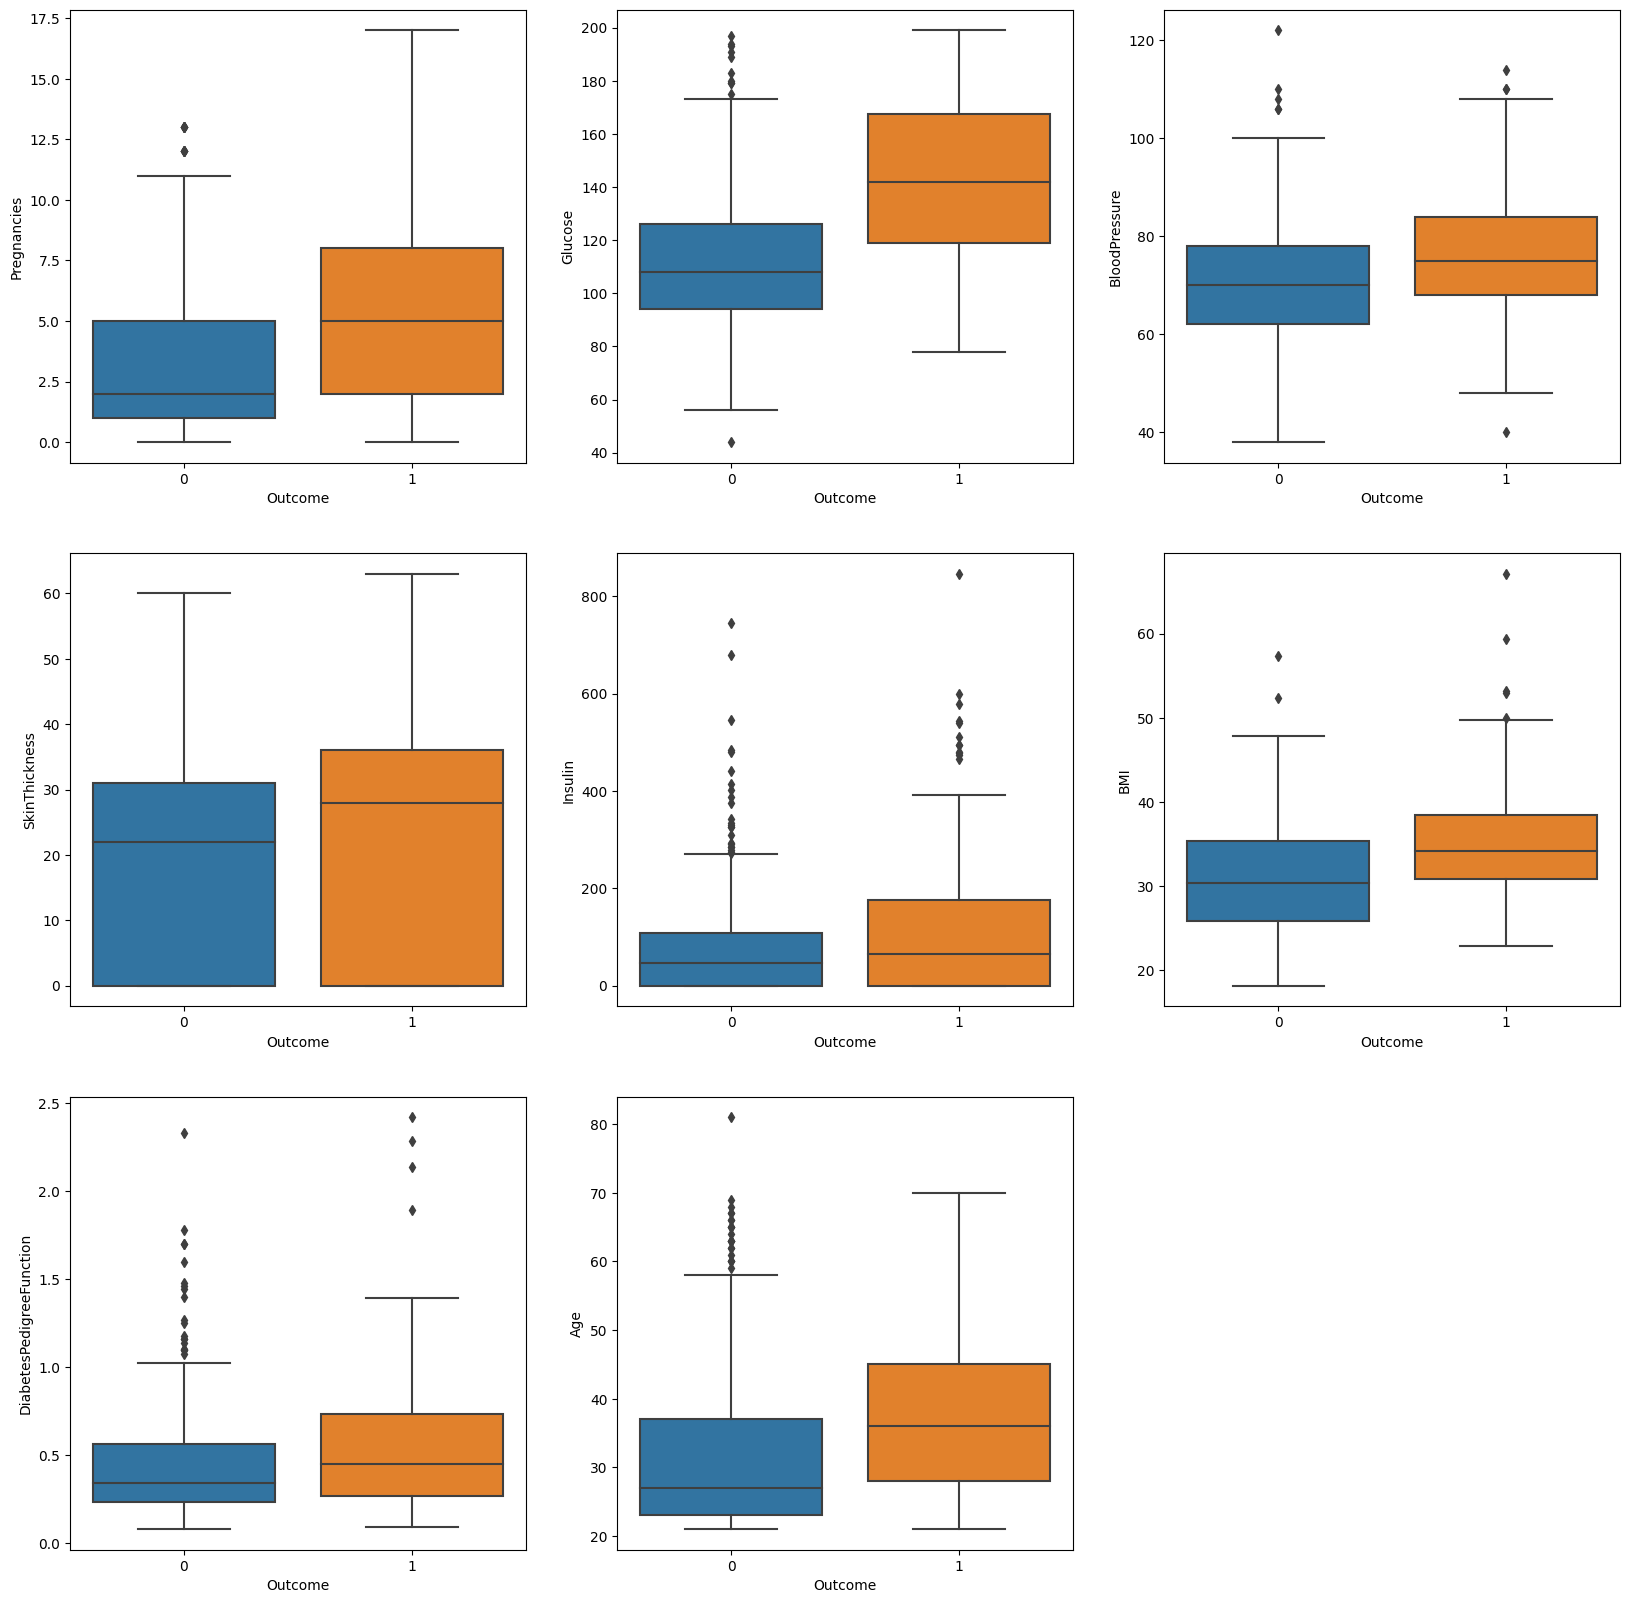

In [98]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)

<AxesSubplot:>

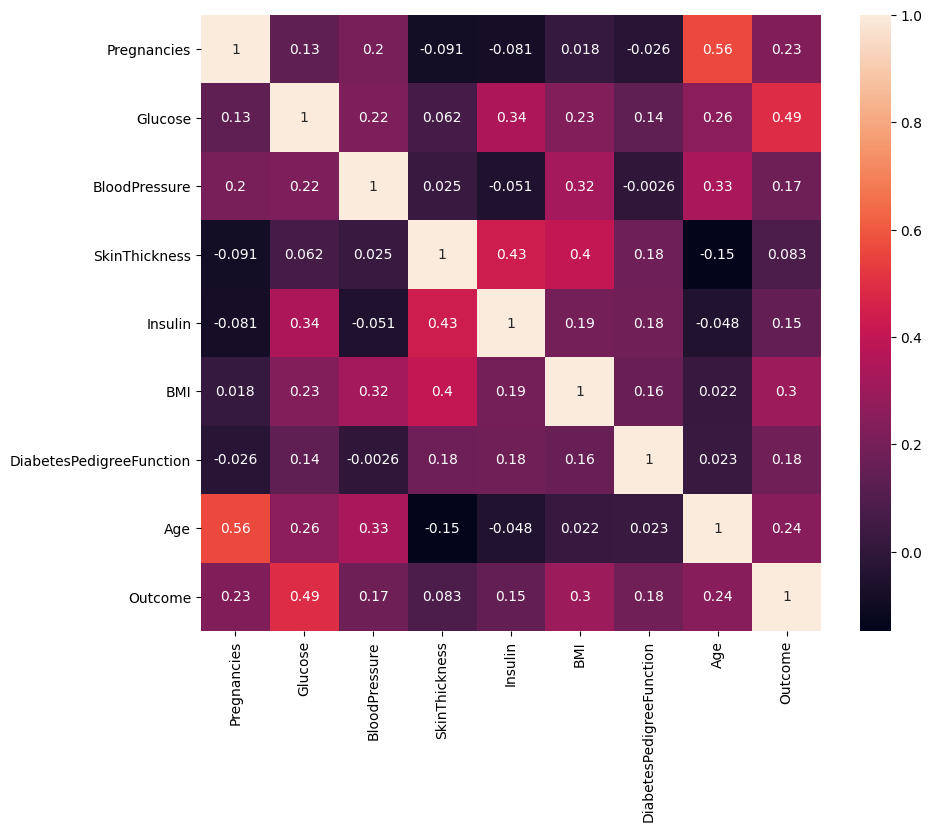

In [99]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

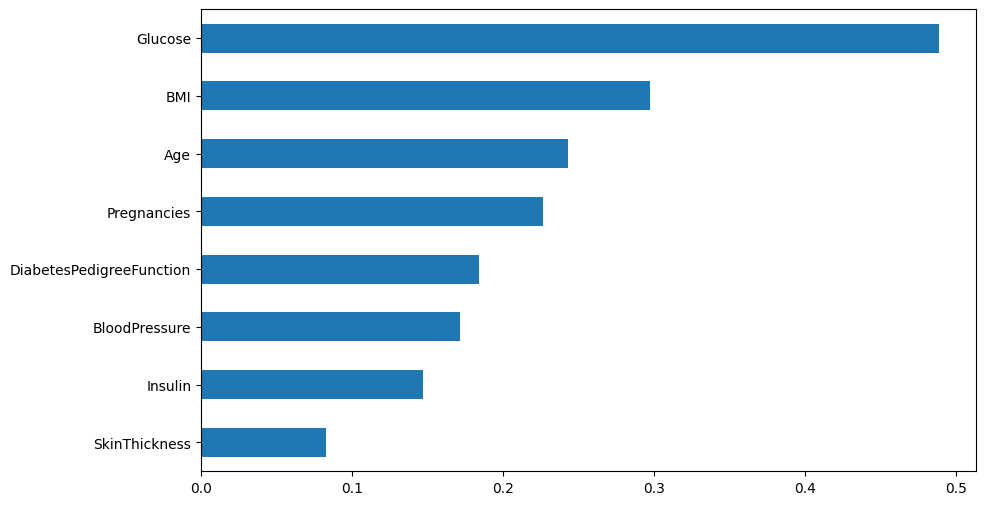

In [100]:
# df.corr()
# df.corr()["Outcome"].sort_values().plot.barh()
df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()

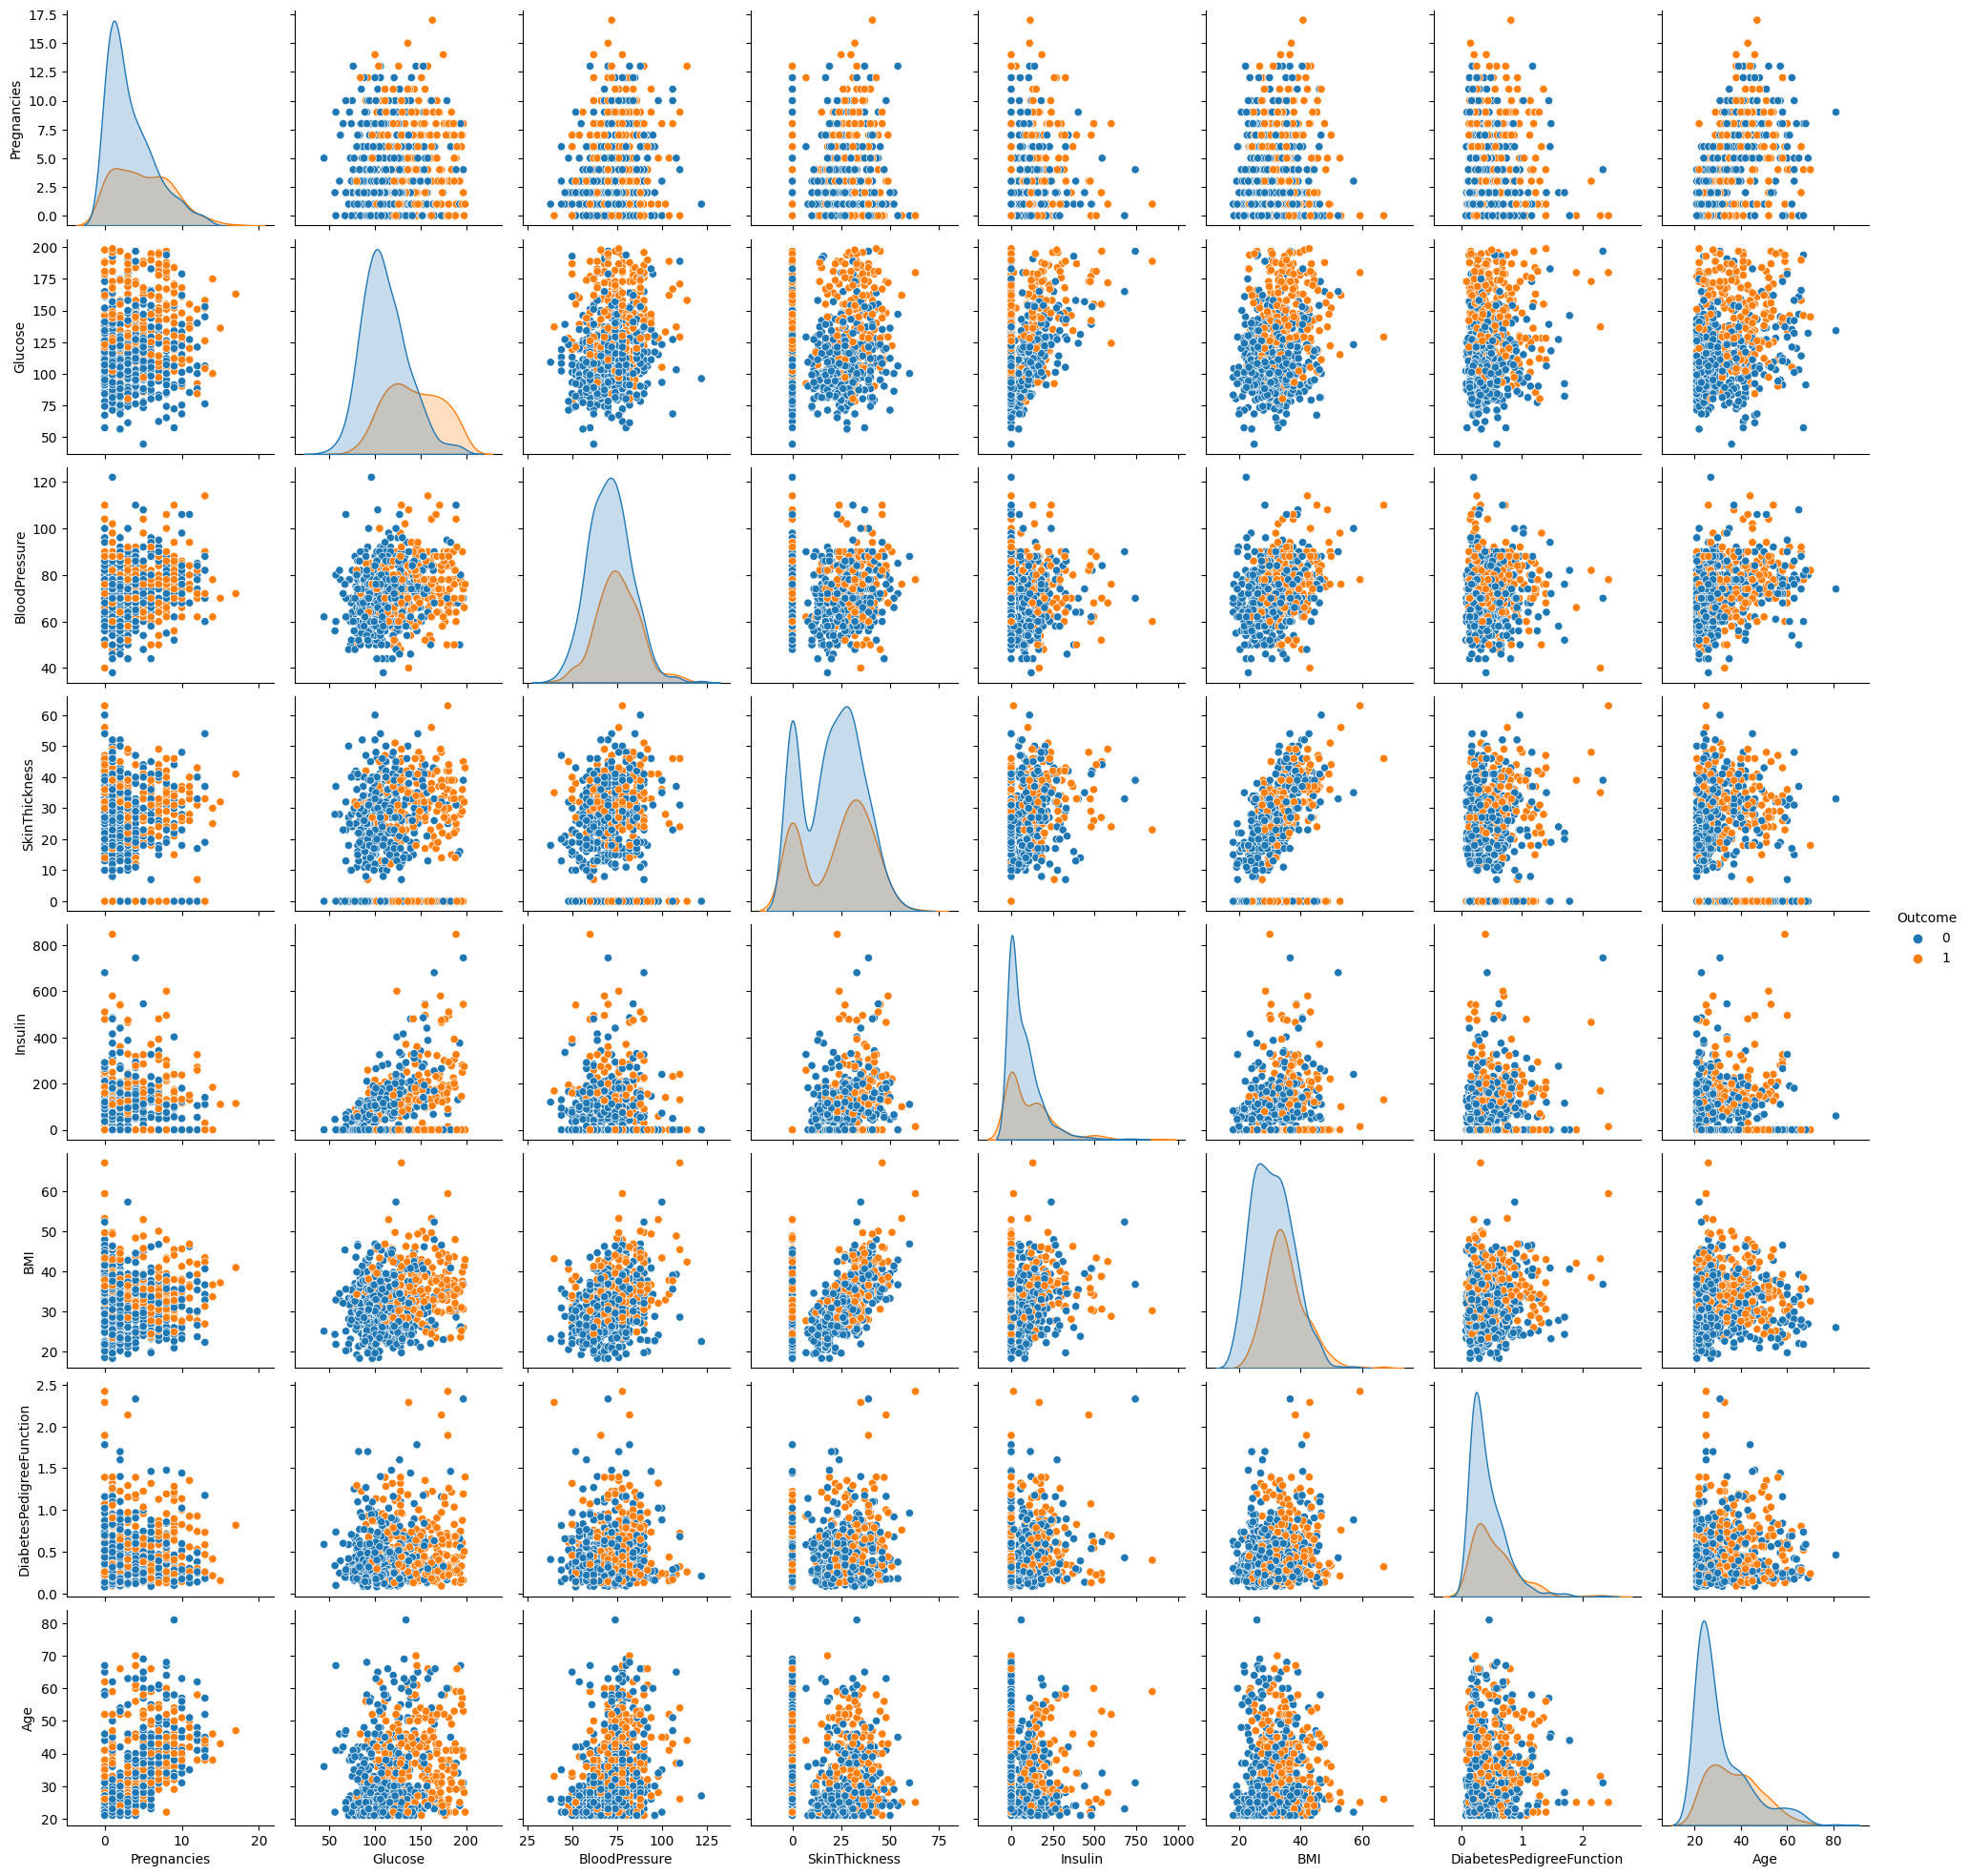

In [101]:
sns.pairplot(df, hue = "Outcome")

## Train | Test Split

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

## Modelling and Model Performance

In [105]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [106]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Without Scalling

In [107]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
eval_metric(svm_model, X_train, y_train, X_test, y_test)

Test_Set
[[90  5]
 [24 25]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        95
           1       0.83      0.51      0.63        49

    accuracy                           0.80       144
   macro avg       0.81      0.73      0.75       144
weighted avg       0.80      0.80      0.78       144


Train_Set
[[347  31]
 [110  88]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       378
           1       0.74      0.44      0.56       198

    accuracy                           0.76       576
   macro avg       0.75      0.68      0.69       576
weighted avg       0.75      0.76      0.74       576



In [108]:
from sklearn.model_selection import cross_validate

model = SVC(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.738
test_precision   0.708
test_recall      0.420
test_f1          0.520
dtype: float64

### With Scalling

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [110]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

In [111]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[347  31]
 [ 74 124]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       378
           1       0.80      0.63      0.70       198

    accuracy                           0.82       576
   macro avg       0.81      0.77      0.79       576
weighted avg       0.82      0.82      0.81       576



In [112]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.752
test_precision   0.673
test_recall      0.536
test_f1          0.594
dtype: float64

+ In Support Vector Machines (SVM), feature scaling or normalization are not strictly required, but are highly recommended, as it can significantly improve model performance and convergence speed. 

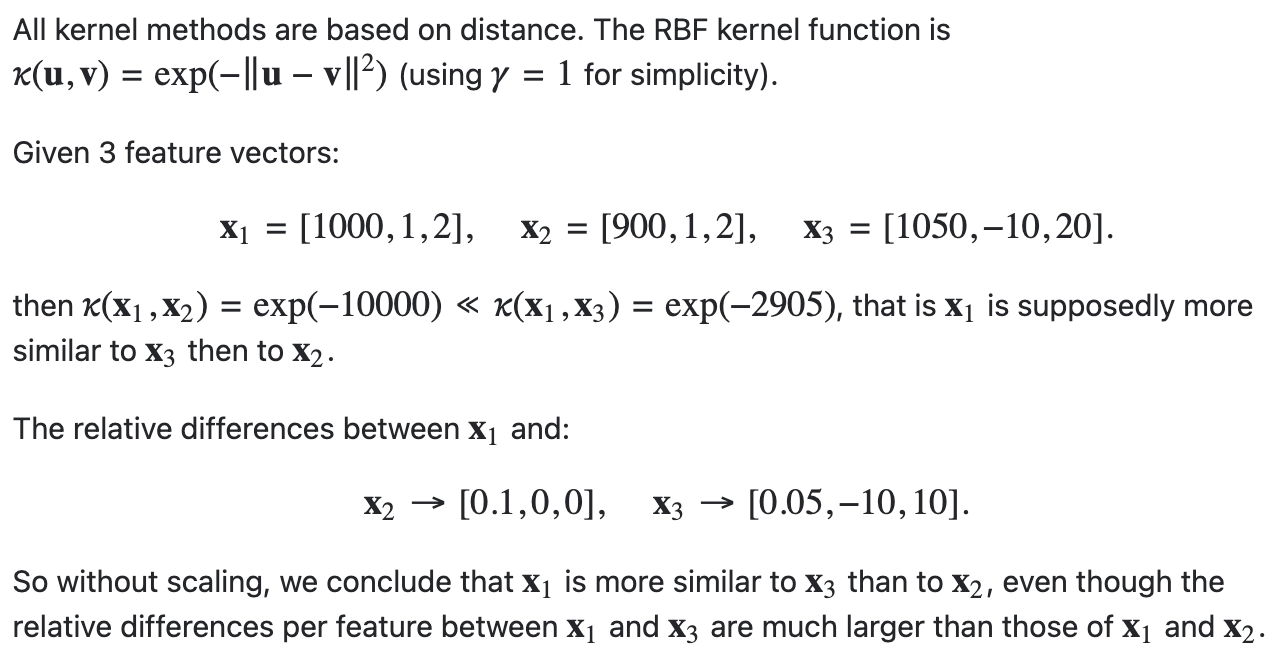

### With Best Parameters (GridsearchCV)

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC__kernel': ['rbf', 'linear',"poly"],
              'SVC__degree':[1,2,3,4,5,6]}

In [115]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, class_weight="balanced", random_state=42))]
pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model, param_grid, scoring="recall", cv=10)

In [116]:
svm_model_grid.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__degree': [1, 2, 3, 4, 5, 6],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear', 'poly']},
             scoring='recall')>

In [117]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__degree': [1, 2, 3, 4, 5, 6],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear', 'poly']},
             scoring='recall')

In [118]:
svm_model_grid.best_params_

{'SVC__C': 0.05, 'SVC__degree': 1, 'SVC__gamma': 0.3, 'SVC__kernel': 'rbf'}

In [119]:
pd.DataFrame(svm_model_grid.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0            0.024         0.001            0.002           0.000   
1            0.014         0.000            0.001           0.000   
2            0.015         0.000            0.001           0.000   
3            0.024         0.000            0.002           0.000   
4            0.014         0.000            0.001           0.000   
..             ...           ...              ...             ...   
283          0.011         0.000            0.001           0.000   
284          0.018         0.000            0.001           0.000   
285          0.022         0.000            0.002           0.000   
286          0.011         0.000            0.001           0.000   
287          0.024         0.001            0.001           0.000   

    param_SVC__C param_SVC__degree param_SVC__gamma param_SVC__kernel  \
0          0.001                 1            scale               rbf   
1          0.001                 1            scale            linear   
2          0.001                 1            scale              poly   
3          0.001                 1             auto               rbf   
4          0.001                 1             auto            linear   
..           ...               ...              ...               ...   
283        0.100                 6            0.200            linear   
284        0.100                 6            0.200              poly   
285        0.100                 6            0.300               rbf   
286        0.100                 6            0.300            linear   
287        0.100                 6            0.300              poly   

                                                params  split0_test_score  \
0    {'SVC__C': 0.001, 'SVC__degree': 1, 'SVC__gamm...              0.000   
1    {'SVC__C': 0.001, 'SVC__degree': 1, 'SVC__gamm...              0.500   
2    {'SVC__C': 0.001, 'SVC__degree': 1, 'SVC__gamm...              0.000   
3    {'SVC__C': 0.001, 'SVC__degree': 1, 'SVC__gamm...              0.000   
4    {'SVC__C': 0.001, 'SVC__degree': 1, 'SVC__gamm...              0.500   
..                                                 ...                ...   
283  {'SVC__C': 0.1, 'SVC__degree': 6, 'SVC__gamma'...              0.500   
284  {'SVC__C': 0.1, 'SVC__degree': 6, 'SVC__gamma'...              0.350   
285  {'SVC__C': 0.1, 'SVC__degree': 6, 'SVC__gamma'...              0.850   
286  {'SVC__C': 0.1, 'SVC__degree': 6, 'SVC__gamma'...              0.500   
287  {'SVC__C': 0.1, 'SVC__degree': 6, 'SVC__gamma'...              0.250   

     ...  split3_test_score  split4_test_score  split5_test_score  \
0    ...              0.000              0.000              0.000   
1    ...              0.750              0.800              0.600   
2    ...              0.000              0.000              0.000   
3    ...              0.000              0.000              0.000   
4    ...              0.750              0.800              0.600   
..   ...                ...                ...                ...   
283  ...              0.800              0.650              0.650   
284  ...              0.450              0.350              0.200   
285  ...              0.900              0.950              0.800   
286  ...              0.800              0.650              0.650   
287  ...              0.400              0.450              0.300   

     split6_test_score  split7_test_score  split8_test_score  \
0                1.000              1.000              0.000   
1                0.632              0.684              0.650   
2                1.000              1.000              0.000   
3                1.000              1.000              0.000   
4                0.632              0.684              0.650   
..                 ...                ...                ...   
283              0.737              0.789              0.700   
284              0.368           

In [120]:
svm_model_grid.best_index_

81

`svm_model_grid.best_score_` genellikle, bir modelin parametre ayarlamasının bir parçası olarak bir ızgara arama (`GridSearchCV`) kullanıldığında bulunur. Bu değer, çapraz doğrulama (cross-validation) kullanılarak elde edilen en iyi skorun değeridir. İlgili değer, modelin farklı parametre kombinasyonlarını denediği ve en iyi performansı veren parametreleri bulmaya çalıştığı bir sürecin sonucunda bulunur.

Bu değerin nasıl hesaplandığına dair daha detaylı bir açıklama yapalım:

1. **Parametre Uzayının Tanımlanması**: İlk adımda, SVM modelinin hangi parametrelerinin ayarlanacağı ve bu parametrelerin hangi değerler arasında olacağı belirlenir. Örneğin, C değeri, kernel tipi gibi.

2. **Çapraz Doğrulama (Cross-Validation) Yöntemi**: Hangi çapraz doğrulama stratejisinin kullanılacağı belirlenir. Bu, veri kümesinin eğitim ve doğrulama kümesi olarak nasıl bölüneceğini belirler. Örneğin, 5-katlı çapraz doğrulama, veri kümesini 5 eşit parçaya böler.

3. **Skorlama Metriği**: Hangi metriğin (örneğin, doğruluk, F1 skoru) kullanılacağı belirlenir. Bu metrik, farklı parametre kombinasyonlarının performansını değerlendirmek için kullanılır.

4. **Tüm Parametre Kombinasyonlarının Değerlendirilmesi**: Belirlenen parametre uzayı içindeki tüm mümkün kombinasyonlar denenebilir. Her kombinasyon için, belirlenen çapraz doğrulama stratejisi kullanılarak model eğitilir ve skorlama metriği ile değerlendirilir.

5. **En İyi Skorun Bulunması**: Tüm kombinasyonlar için elde edilen skorlar arasından en yüksek olanı bulunur. Bu en yüksek skor, `svm_model_grid.best_score_` olarak kaydedilir.

6. **En İyi Parametrelerin Kaydedilmesi**: Aynı zamanda, bu en yüksek skora sahip olan parametre kombinasyonu da kaydedilir. Bu kombinasyon, modelin nihai olarak eğitilip kullanılacağı parametreler olacaktır.

Sonuç olarak, `svm_model_grid.best_score_` değeri, belirlenen parametre aralığı ve çapraz doğrulama stratejisi ile en iyi performansı veren parametre kombinasyonunun skorudur. Bu, modelin genelleme yeteneğinin bir ölçüsü olarak kabul edilir, çünkü model, görünmeyen verilere ne kadar iyi uyum sağlayabileceğini ölçmek için çapraz doğrulama kullanılarak değerlendirilmiştir.

In [121]:
svm_model_grid.best_score_ #cv için %75 trainden bu skor elde edildi, daha fazla veri ile metrikler daha iyi skor verebilir.

0.8942105263157896

In [122]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[45 50]
 [ 3 46]]
              precision    recall  f1-score   support

           0       0.94      0.47      0.63        95
           1       0.48      0.94      0.63        49

    accuracy                           0.63       144
   macro avg       0.71      0.71      0.63       144
weighted avg       0.78      0.63      0.63       144


Train_Set
[[190 188]
 [ 19 179]]
              precision    recall  f1-score   support

           0       0.91      0.50      0.65       378
           1       0.49      0.90      0.63       198

    accuracy                           0.64       576
   macro avg       0.70      0.70      0.64       576
weighted avg       0.76      0.64      0.64       576



In [123]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(C= 0.05, gamma= 0.3, kernel= 'rbf', probability=True, 
class_weight="balanced", random_state=42))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.616
test_precision   0.475
test_recall      0.894
test_f1          0.618
dtype: float64

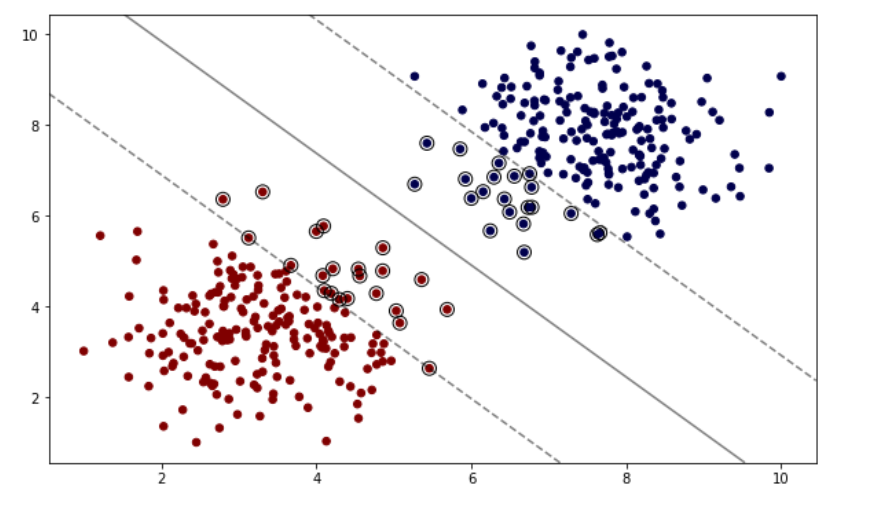

In [124]:
X_test.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
673            3      123            100             35      240 57.300   
561            0      198             66             32      274 41.300   
374            2      122             52             43      158 36.200   
70             2      100             66             20       90 32.900   
2              8      183             64              0        0 23.300   

     DiabetesPedigreeFunction  Age  
673                     0.880   22  
561                     0.502   28  
374                     0.816   28  
70                      0.867   28  
2                       0.672   32

In [125]:
from sklearn.preprocessing import MinMaxScaler

# Karar fonksiyonunun değerlerini hesaplayın
decision_function_values = svm_model.decision_function(X_test)

# Değerleri yeniden şekillendirin (eğer gerekliyse)
decision_function_values = decision_function_values.reshape(-1, 1)

# Min-Max ölçekleyicisini yaratın ve değerlere uygulayın
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(decision_function_values)

# Normalleştirilmiş değerler artık 0 ile 1 arasında olacak

In [126]:
svm_model_grid.decision_function(X_test)
#The output of training is a decision function that tells us how close to the line we are (close to the boundary means a low-confidence decision).
#scale yap!!!!!

array([ 0.6092764 ,  0.84263767,  0.47386186, -0.28237901,  0.76803772,
       -0.62884362, -0.09844843,  0.86154427, -0.97054695, -0.05094376,
        0.18120991,  0.5170356 , -0.04729025, -0.47376938,  0.94867542,
        0.55804293, -0.86444305,  0.93325274,  0.69693388, -1.10693844,
        0.71138957, -0.25816866,  0.9809129 ,  0.09024727, -0.25546803,
        0.52555535, -0.59437495,  0.33109802, -0.03813883, -0.35114691,
        0.51298606,  0.32688323,  0.43189893,  0.08561673,  0.61718718,
       -0.28024343,  0.67107159,  0.35191176,  0.58870501,  0.24981652,
        0.37974359, -0.89770378, -0.88633092,  0.87825662,  0.6145391 ,
        0.22596048,  0.39718108,  0.63331752,  0.9535457 ,  0.30885256,
        0.49269475, -0.6579449 , -0.00484441, -0.64896428, -0.76417344,
        0.97359193,  0.59407135, -1.22009531,  0.67700748,  0.7735601 ,
        0.79203896,  0.65437864,  0.88127888,  1.04252632,  1.05901944,
       -0.9061641 ,  0.59385633,  0.07694606,  0.67040346, -0.74

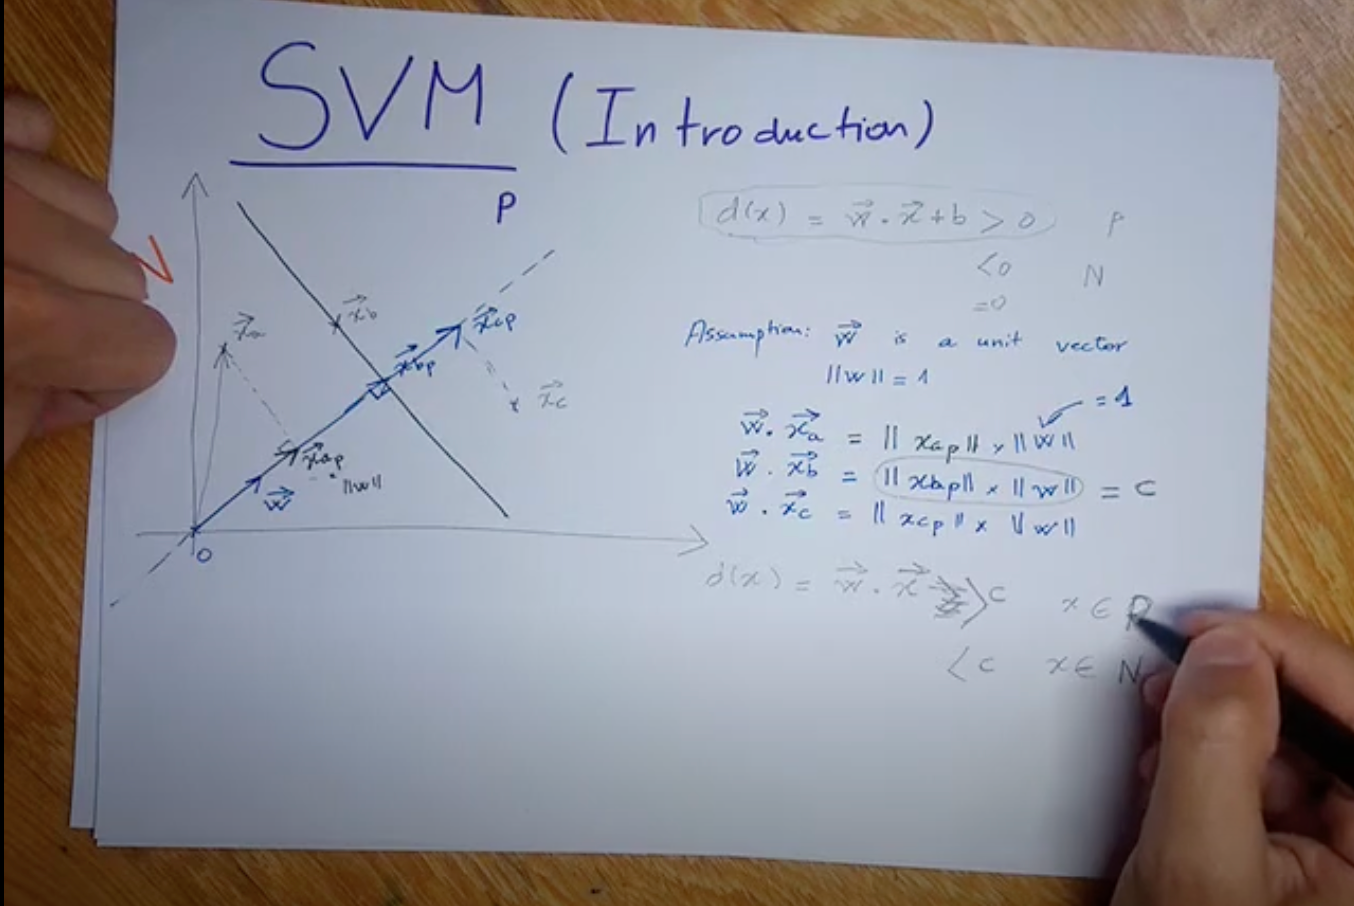

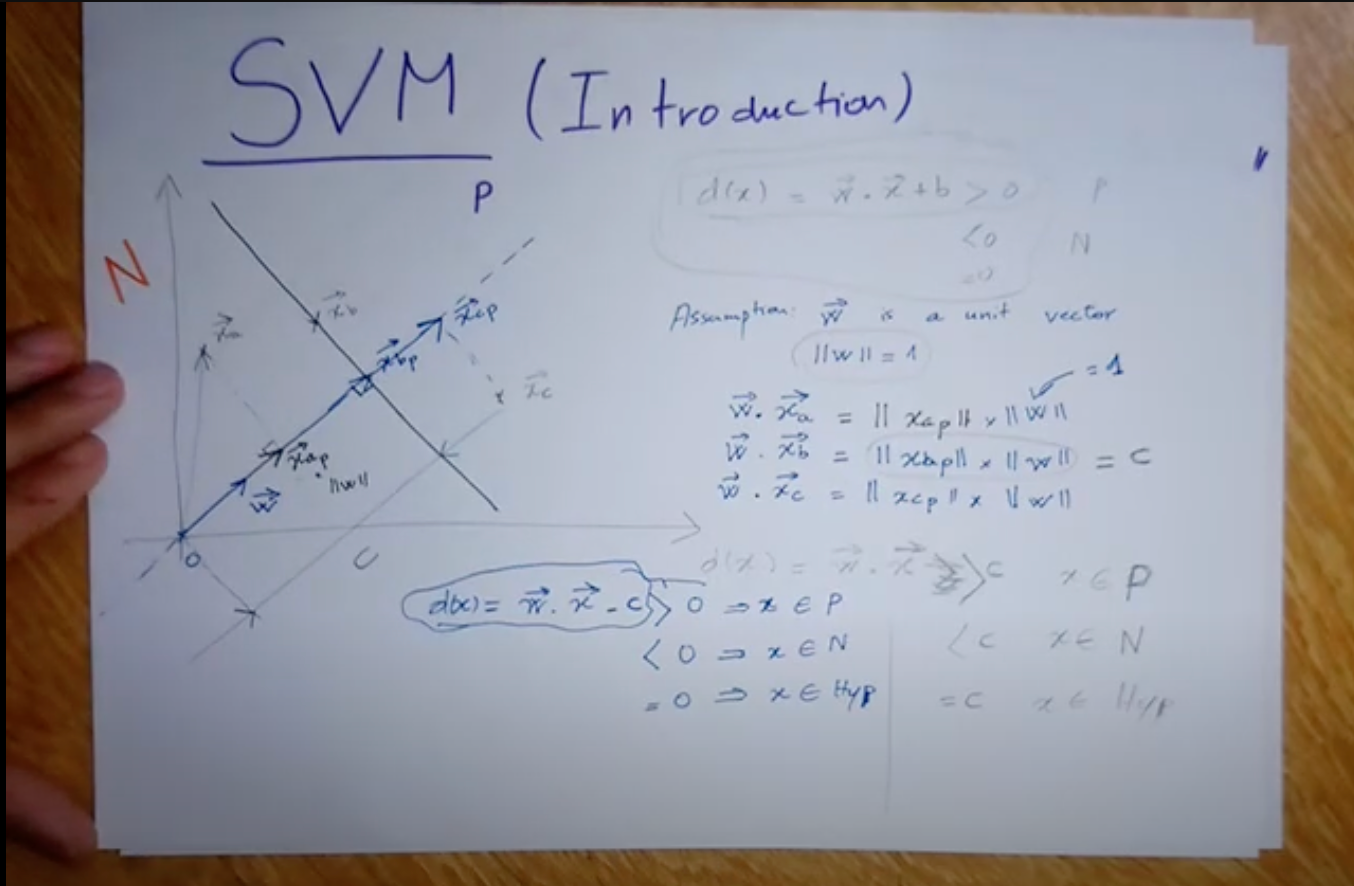

In [127]:
svm_model_grid.predict_proba(X_test)[:,1]

array([0.51361637, 0.65359098, 0.43004773, 0.10311136, 0.61180872,
       0.04805621, 0.15372559, 0.66415893, 0.02071913, 0.16973202,
       0.26695061, 0.45640453, 0.17101636, 0.0666626 , 0.71065883,
       0.48177319, 0.02693865, 0.70270827, 0.56788779, 0.01477363,
       0.57680671, 0.10881437, 0.72686339, 0.22506703, 0.10946742,
       0.46165594, 0.05226052, 0.348341  , 0.17426726, 0.08833368,
       0.4539132 , 0.34609273, 0.40501521, 0.22306479, 0.51853059,
       0.10360358, 0.55191698, 0.35959081, 0.5       , 0.30163572,
       0.37501309, 0.02481259, 0.02552021, 0.67336587, 0.51688586,
       0.28928643, 0.38489037, 0.52854191, 0.71314318, 0.33658789,
       0.44148439, 0.04476158, 0.18650586, 0.04575433, 0.03449485,
       0.72323342, 0.5       , 0.01115476, 0.555585  , 0.61523377,
       0.62672314, 0.54159183, 0.67501693, 0.75621308, 0.76369813,
       0.02429881, 0.5       , 0.21934987, 0.55150401, 0.03620343,
       0.33930125, 0.33653602, 0.58141972, 0.29566363, 0.58277

In [128]:
normalized_values

array([[0.42696217],
       [0.78752609],
       [0.3769616 ],
       [0.14498567],
       [0.71215291],
       [0.07230124],
       [0.26546999],
       [0.68473301],
       [0.06815034],
       [0.23091043],
       [0.21072393],
       [0.35273623],
       [0.19099521],
       [0.23464213],
       [0.74617821],
       [0.09105188],
       [0.1935816 ],
       [0.57225518],
       [0.49460859],
       [0.22374231],
       [0.3811054 ],
       [0.09465266],
       [0.81510802],
       [0.1197395 ],
       [0.15738271],
       [0.15416277],
       [0.10333429],
       [0.4715856 ],
       [0.37786905],
       [0.14490488],
       [0.16520653],
       [0.58922614],
       [0.38624145],
       [0.2037726 ],
       [0.62387868],
       [0.14384685],
       [0.27165478],
       [0.30786609],
       [0.48658824],
       [0.14048913],
       [0.21869294],
       [0.15476797],
       [0.04609292],
       [0.69521321],
       [0.45682861],
       [0.32964494],
       [0.26919817],
       [0.667

https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/text/linear_classifier_svm.html#:~:text=The%20output%20of%20training%20is,est%20%3D%20svm.

https://mmuratarat.github.io/2019-10-12/probabilistic-output-of-svm#:~:text=One%20standard%20way%20to%20obtain,validation%20on%20the%20training%20data.

## Overall performance of the model

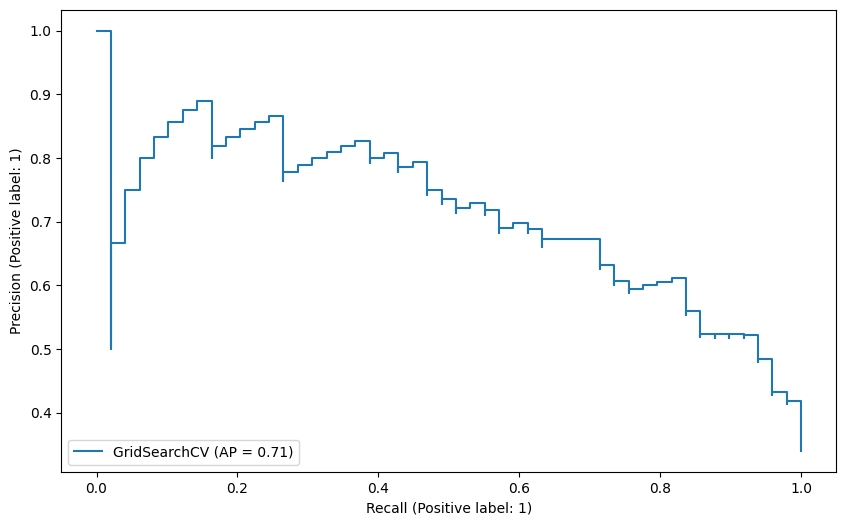

In [129]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve
plot_precision_recall_curve(svm_model_grid, X_test, y_test);

## Finding Best Threshold for max recall score

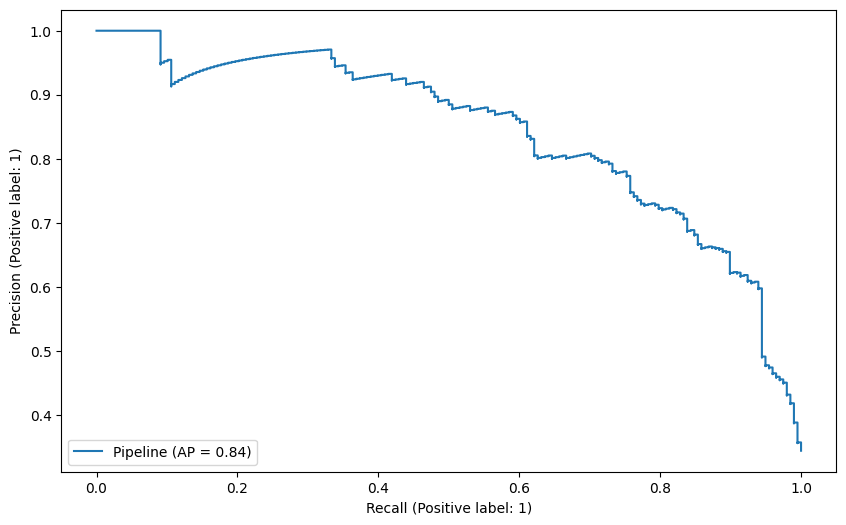

In [130]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, random_state=42))]
svc_basic_model = Pipeline(steps=operations)

svc_basic_model.fit(X_train, y_train)
plot_precision_recall_curve(svc_basic_model, X_train, y_train);

In [143]:
y_pred_proba2 = svm_model_grid.predict_proba(X_train)
average_precision_score(y_train, y_pred_proba2[:,1])

0.7552881852810682

In [144]:
precisions2, recalls2, thresholds2 = precision_recall_curve(y_train, y_pred_proba2[:,1])

In [145]:
optimal_idx2 = np.argmax((2 * precisions2 * recalls2) / (precisions2 + recalls2))
optimal_threshold2 = thresholds[optimal_idx2]
optimal_threshold2

0.5273005200236947

In [146]:
y_pred3 = pd.Series(svm_model_grid.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= optimal_threshold2 else 0)

In [147]:
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[82 13]
 [19 30]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84        95
           1       0.70      0.61      0.65        49

    accuracy                           0.78       144
   macro avg       0.75      0.74      0.74       144
weighted avg       0.77      0.78      0.77       144



In [131]:
y_pred_proba = svc_basic_model.predict_proba(X_train)
average_precision_score(y_train, y_pred_proba[:,1])

0.8415032373442909

In [132]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [133]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.3069561306924307

In [134]:
y_pred2 = pd.Series(svm_model_grid.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [135]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[59 36]
 [ 7 42]]
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        95
           1       0.54      0.86      0.66        49

    accuracy                           0.70       144
   macro avg       0.72      0.74      0.70       144
weighted avg       0.77      0.70      0.71       144



+ proba varsa threshold var.

In [136]:
y_train_pred2 = pd.Series(svm_model_grid.predict_proba(X_train)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[229 149]
 [ 29 169]]
              precision    recall  f1-score   support

           0       0.89      0.61      0.72       378
           1       0.53      0.85      0.66       198

    accuracy                           0.69       576
   macro avg       0.71      0.73      0.69       576
weighted avg       0.77      0.69      0.70       576



In [137]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [138]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(C= 0.05, gamma= 0.3, kernel= 'rbf', probability=True, 
                                                        class_weight="balanced",random_state=42))]
model = Pipeline(steps=operations)
CV(10, model, X_train, y_train, optimal_threshold)

Accuracy      66.82%  std 6.92%
Precision-1   51.26%  std 5.80%
Recall-1      84.84%  std 10.52%
F1_score-1    63.76%  std 6.85%


## Logistic regression